In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aerial-cactus-identification/sample_submission.csv
/kaggle/input/aerial-cactus-identification/test.zip
/kaggle/input/aerial-cactus-identification/train.zip
/kaggle/input/aerial-cactus-identification/train.csv


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers, optimizers



import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [7]:
traindf=pd.read_csv('../input/aerial-cactus-identification/train.csv',dtype=str)

testdf=pd.read_csv('../input/aerial-cactus-identification/sample_submission.csv',dtype=str)

In [10]:
traindf.head(5)
traindf.has_cactus=traindf.has_cactus.astype(str)

In [11]:
print('out dataset has {} rows and {} columns'.format(traindf.shape[0],traindf.shape[1]))

out dataset has 17500 rows and 2 columns


In [13]:
traindf['has_cactus'].value_counts()

1    13136
0     4364
Name: has_cactus, dtype: int64

In [29]:
import zipfile

Dataset = "train"


with zipfile.ZipFile("../input/aerial-cactus-identification/"+Dataset+".zip","r") as z:
    z.extractall(".")
    


In [37]:
print(os.listdir("../working/"))

['__notebook_source__.ipynb', 'train', '.ipynb_checkpoints']


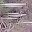

In [39]:
from IPython.display import Image
from keras.preprocessing import image
Image(os.path.join("../working/train/",traindf.iloc[0,0]),width=250,height=250)

In [8]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

In [40]:
train_generator=datagen.flow_from_dataframe(
dataframe=traindf,
directory="../working/train/",
x_col="id",
y_col="has_cactus",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="binary",
target_size=(150,150))

Found 13125 validated image filenames belonging to 2 classes.


In [42]:
valid_generator=datagen.flow_from_dataframe(
dataframe=traindf,
directory="../working/train/",
x_col="id",
y_col="has_cactus",
subset="validation",
batch_size=32,
seed=42,
shuffle=True,
class_mode="binary",
target_size=(150,150))

Found 4375 validated image filenames belonging to 2 classes.


In [43]:
Dataset = "test"


with zipfile.ZipFile("../input/aerial-cactus-identification/"+Dataset+".zip","r") as z:
    z.extractall(".")
    
print(os.listdir("../working/"))

['__notebook_source__.ipynb', 'train', 'test', '.ipynb_checkpoints']


In [44]:
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=testdf,
directory="../working/test/",
x_col="id",
y_col=None,
batch_size=32,
seed=42,
shuffle=False,
class_mode=None,
target_size=(150,150))

Found 4000 validated image filenames.


In [46]:
from keras import layers, models
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, ZeroPadding2D
from keras.models import Model

import keras.backend as K
from keras.models import Sequential

In [47]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)       

In [48]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [49]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=10,validation_data=valid_generator,validation_steps=50)

Epoch 1/10
100/100 [==============================] - 82s 817ms/step - loss: 0.3913 - accuracy: 0.8046 - val_loss: 0.3892 - val_accuracy: 0.9300
Epoch 2/10
100/100 [==============================] - 80s 802ms/step - loss: 0.2475 - accuracy: 0.9159 - val_loss: 0.2159 - val_accuracy: 0.9225
Epoch 3/10
100/100 [==============================] - 81s 807ms/step - loss: 0.1765 - accuracy: 0.9388 - val_loss: 0.0655 - val_accuracy: 0.9397
Epoch 4/10
100/100 [==============================] - 81s 810ms/step - loss: 0.1446 - accuracy: 0.9509 - val_loss: 0.1935 - val_accuracy: 0.9419
Epoch 5/10
100/100 [==============================] - 80s 800ms/step - loss: 0.1133 - accuracy: 0.9593 - val_loss: 0.0811 - val_accuracy: 0.9419
Epoch 6/10
100/100 [==============================] - 81s 809ms/step - loss: 0.1050 - accuracy: 0.9616 - val_loss: 0.0278 - val_accuracy: 0.9635
Epoch 7/10
100/100 [==============================] - 97s 972ms/step - loss: 0.1043 - accuracy: 0.9647 - val_loss: 0.0115 - val_ac